Parte 1: Importación de bibliotecas

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')


Parte 2: Cargar datos


In [32]:
ruta_archivo = "/home/carizac/documnetos/proyecto_nlp/Seriesforecasting/train-00000-of-00001.parquet"
df = pd.read_parquet(ruta_archivo)
df.rename(columns={'__index_level_0__': 'Datetime'}, inplace=True)
df.sort_values('Datetime', inplace=True)
df.set_index('Datetime', inplace=True)

print("\n\u2714\ufe0f Shape del DataFrame:", df.shape)
print("\u2714\ufe0f Tipos de datos:\n", df.dtypes)
print("\u2714\ufe0f Rango de fechas:", df.index.min(), "a", df.index.max())


✔️ Shape del DataFrame: (1344, 2)
✔️ Tipos de datos:
 Demand         float64
Temperature    float64
dtype: object
✔️ Rango de fechas: 2014-01-01 00:00:00 a 2014-02-25 23:00:00


Parte 3: Exploración y gráfica inicial

✔️ Frecuencia promedio: Datetime
0 days 01:00:00    1343
Name: count, dtype: int64
✔️ Nulos por columna:
 Demand         0
Temperature    0
dtype: int64


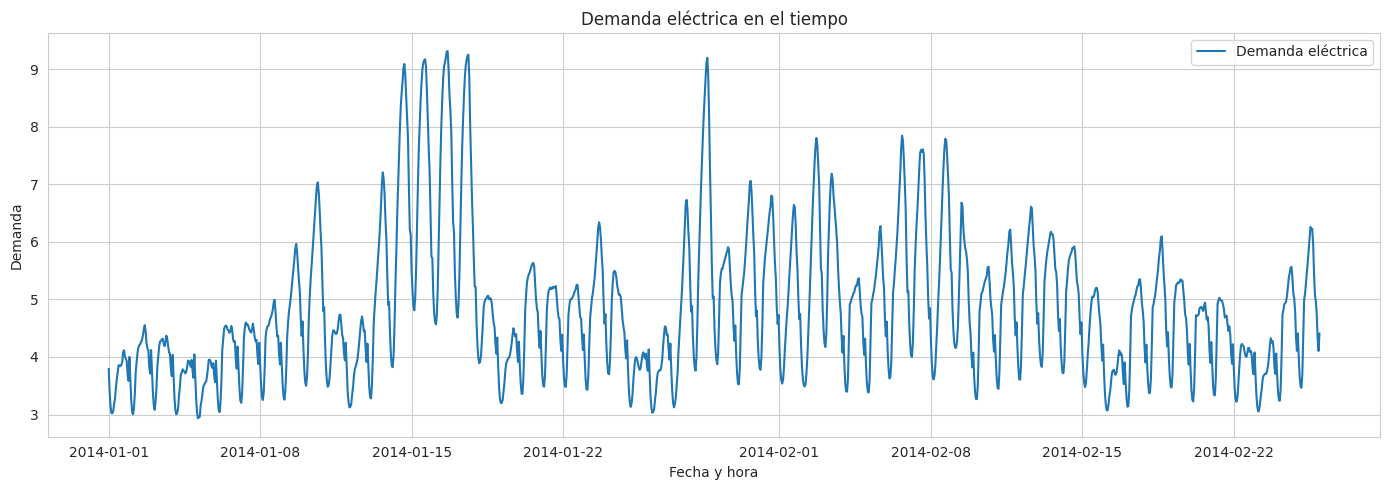

In [33]:
print("\u2714\ufe0f Frecuencia promedio:", df.index.to_series().diff().value_counts().head())
print("\u2714\ufe0f Nulos por columna:\n", df.isnull().sum())

plt.figure(figsize=(14,5))
plt.plot(df['Demand'], label='Demanda eléctrica')
plt.title('Demanda eléctrica en el tiempo')
plt.xlabel('Fecha y hora')
plt.ylabel('Demanda')
plt.legend()
plt.tight_layout()
plt.show()

Parte 4: Preparar ventanas para modelo

In [36]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df['Demand'].values.reshape(-1, 1))

window_size = 24
X, y = [], []
for i in range(len(data_scaled) - 2 * window_size):
    X.append(data_scaled[i:i+window_size])
    y.append(data_scaled[i+window_size:i+2*window_size])
X = np.array(X)
y = np.array(y)

print("\n\u2714\ufe0f Shape de X:", X.shape)  # (n_dias, 24, 1)
print("\u2714\ufe0f Shape de y:", y.shape)


✔️ Shape de X: (1296, 24, 1)
✔️ Shape de y: (1296, 24, 1)


Parte 5: División train/test

In [37]:
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]


print("\n\u2714\ufe0f Tamaños:")
print("X_train:", X_train.shape, "X_test:", X_test.shape)
print("y_train:", y_train.shape, "y_test:", y_test.shape)


✔️ Tamaños:
X_train: (1036, 24, 1) X_test: (260, 24, 1)
y_train: (1036, 24, 1) y_test: (260, 24, 1)


Parte 6: Definir y entrenar el modelo

In [39]:
model = Sequential([
    LSTM(64, activation='relu', input_shape=(24, 1), return_sequences=True),
    Dense(24)
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


print("\n\u2714\ufe0f Resumen del modelo:")
model.summary()
history = model.fit(X_train, y_train, epochs=30, batch_size=16, validation_split=0.2, verbose=1)


✔️ Resumen del modelo:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 24, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 24, 24)         │         1,560 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,456 (72.09 KB)

 Trainable params: 18,456 (72.09 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.1132 - mae: 0.2614 - val_loss: 0.0459 - val_mae: 0.1719
Epoch 2/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0443 - mae: 0.1554 - val_loss: 0.0292 - val_mae: 0.1336
Epoch 3/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0319 - mae: 0.1340 - val_loss: 0.0219 - val_mae: 0.1130
Epoch 4/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0298 - mae: 0.1309 - val_loss: 0.0187 - val_mae: 0.1035
Epoch 5/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0273 - mae: 0.1246 - val_loss: 0.0170 - val_mae: 0.0981
Epoch 6/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0266 - mae: 0.1229 - val_loss: 0.0163 - val_mae: 0.0958
Epoch 7/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0233 - mae: 0.1145 - val_loss: 0.0170 - val_mae: 0.0991
Epoch 8/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0236 - mae: 0.1153 - val_loss: 0.0146 - val_mae: 0.0892
Epoch 9/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.024

Parte 7: Evaluación

In [40]:
y_pred = model.predict(X_test)

# Validación de dimensiones
print("\n\u2714\ufe0f Predicciones:", y_pred.shape)

# Invertimos la normalización
y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1)).reshape(y_pred.shape)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(y_test.shape)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step

✔️ Predicciones: (260, 24, 24)


Parte 8: Visualización

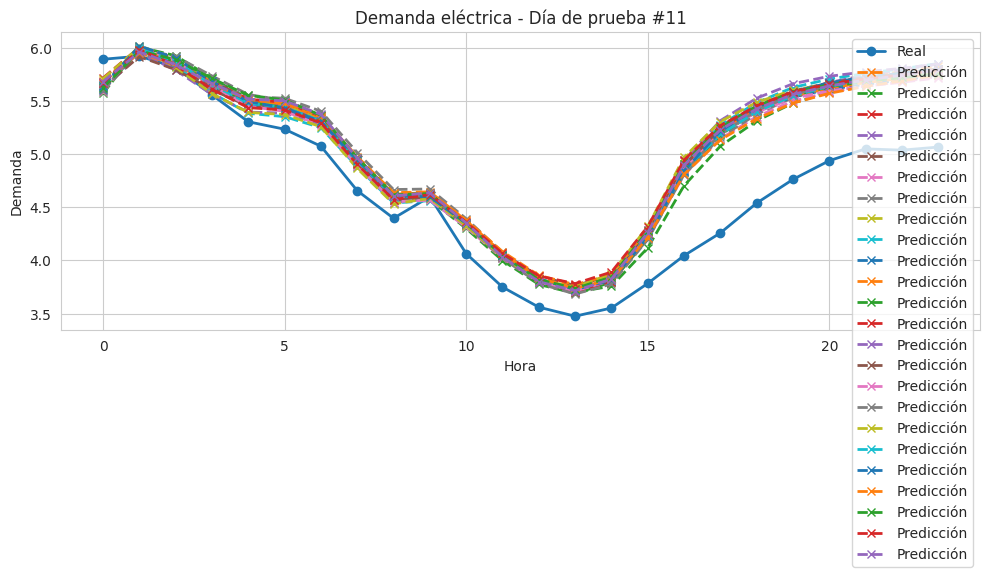

In [48]:
plt.figure(figsize=(10, 5))
dia = 10
plt.plot(y_test_inv[dia], label="Real", marker='o', linewidth=2)
plt.plot(y_pred_inv[dia], label="Predicción", marker='x', linestyle='--', linewidth=2)
plt.title(f"Demanda eléctrica - Día de prueba #{dia + 1}")
plt.xlabel("Hora")
plt.ylabel("Demanda")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [52]:
# Parámetros opcionales
fecha_base = pd.to_datetime("2014-02-15")  # <-- Ajusta según tu data real

# Crear un DataFrame limpio y listo para Power BI
registros = []

for dia in range(len(y_test_inv)):
    for hora in range(24):
        real = float(y_test_inv[dia, hora][0])
        pred = float(y_pred_inv[dia, hora][0])
        error_abs = abs(real - pred)
        error_rel = error_abs / real if real != 0 else 0

        registros.append({
            "dia_test": dia + 1,
            "hora_dia": hora,
            "fecha": fecha_base + pd.Timedelta(days=dia),
            "demanda_real": round(real, 2),
            "demanda_predicha": round(pred, 2),
            "error_absoluto": round(error_abs, 2),
            "error_relativo_pct": round(error_rel * 100, 2)
        })

df_resultado = pd.DataFrame(registros)

# Exportar a CSV limpio
df_resultado.to_csv("resultados_forecasting.csv", index=False)
print("✅ CSV limpio exportado como 'resultados_forecasting.csv'")


✅ CSV limpio exportado como 'resultados_forecasting.csv'
